**LOAD DATA**


In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Get dataset from Github
df = pd.read_csv("https://raw.githubusercontent.com/tanlitung/Datasets/master/HR_comma_sep.csv")

1. Descriptive Analytics
Exploratory Data Analysis(EDA)

In [ ]:
#Check first 5 rows of data
print(df.head(5))

   satisfaction_level  last_evaluation  ...  department  salary
0                0.38             0.53  ...       sales     low
1                0.80             0.86  ...       sales  medium
2                0.11             0.88  ...       sales  medium
3                0.72             0.87  ...       sales     low
4                0.37             0.52  ...       sales     low

[5 rows x 10 columns]


In [ ]:
#Check last 5 rows of data
print(df.tail(5))

       satisfaction_level  last_evaluation  ...  department  salary
14994                0.40             0.57  ...     support     low
14995                0.37             0.48  ...     support     low
14996                0.37             0.53  ...     support     low
14997                0.11             0.96  ...     support     low
14998                0.37             0.52  ...     support     low

[5 rows x 10 columns]


In [ ]:
#See summary of data
print(df.describe(include='all'))

        satisfaction_level  last_evaluation  ...  department  salary
count         14999.000000     14999.000000  ...       14999   14999
unique                 NaN              NaN  ...          10       3
top                    NaN              NaN  ...       sales     low
freq                   NaN              NaN  ...        4140    7316
mean              0.612834         0.716102  ...         NaN     NaN
std               0.248631         0.171169  ...         NaN     NaN
min               0.090000         0.360000  ...         NaN     NaN
25%               0.440000         0.560000  ...         NaN     NaN
50%               0.640000         0.720000  ...         NaN     NaN
75%               0.820000         0.870000  ...         NaN     NaN
max               1.000000         1.000000  ...         NaN     NaN

[11 rows x 10 columns]


In [ ]:
#Change salary data to float datatype
df['salary'] = pd.Series([1 if s == 'low' else 2 if s == 'medium' else 3 for s in df.salary], name = 'salary')
#Check Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


All the info gained:
1. This data is complete, there is no missing data so this will be a good dataset to analyse
2. The mean salary is 1.594 (Note that 1 represents low salary, 2 for medium, 3 for high) This means that the average salary of this particular company is between low and medium.
3. Satisfaction_level, last_evaluation is above 60% , but promotion in the last 5 years is only about 2%, This may explain the low to medium average salary

Distribution Analysis











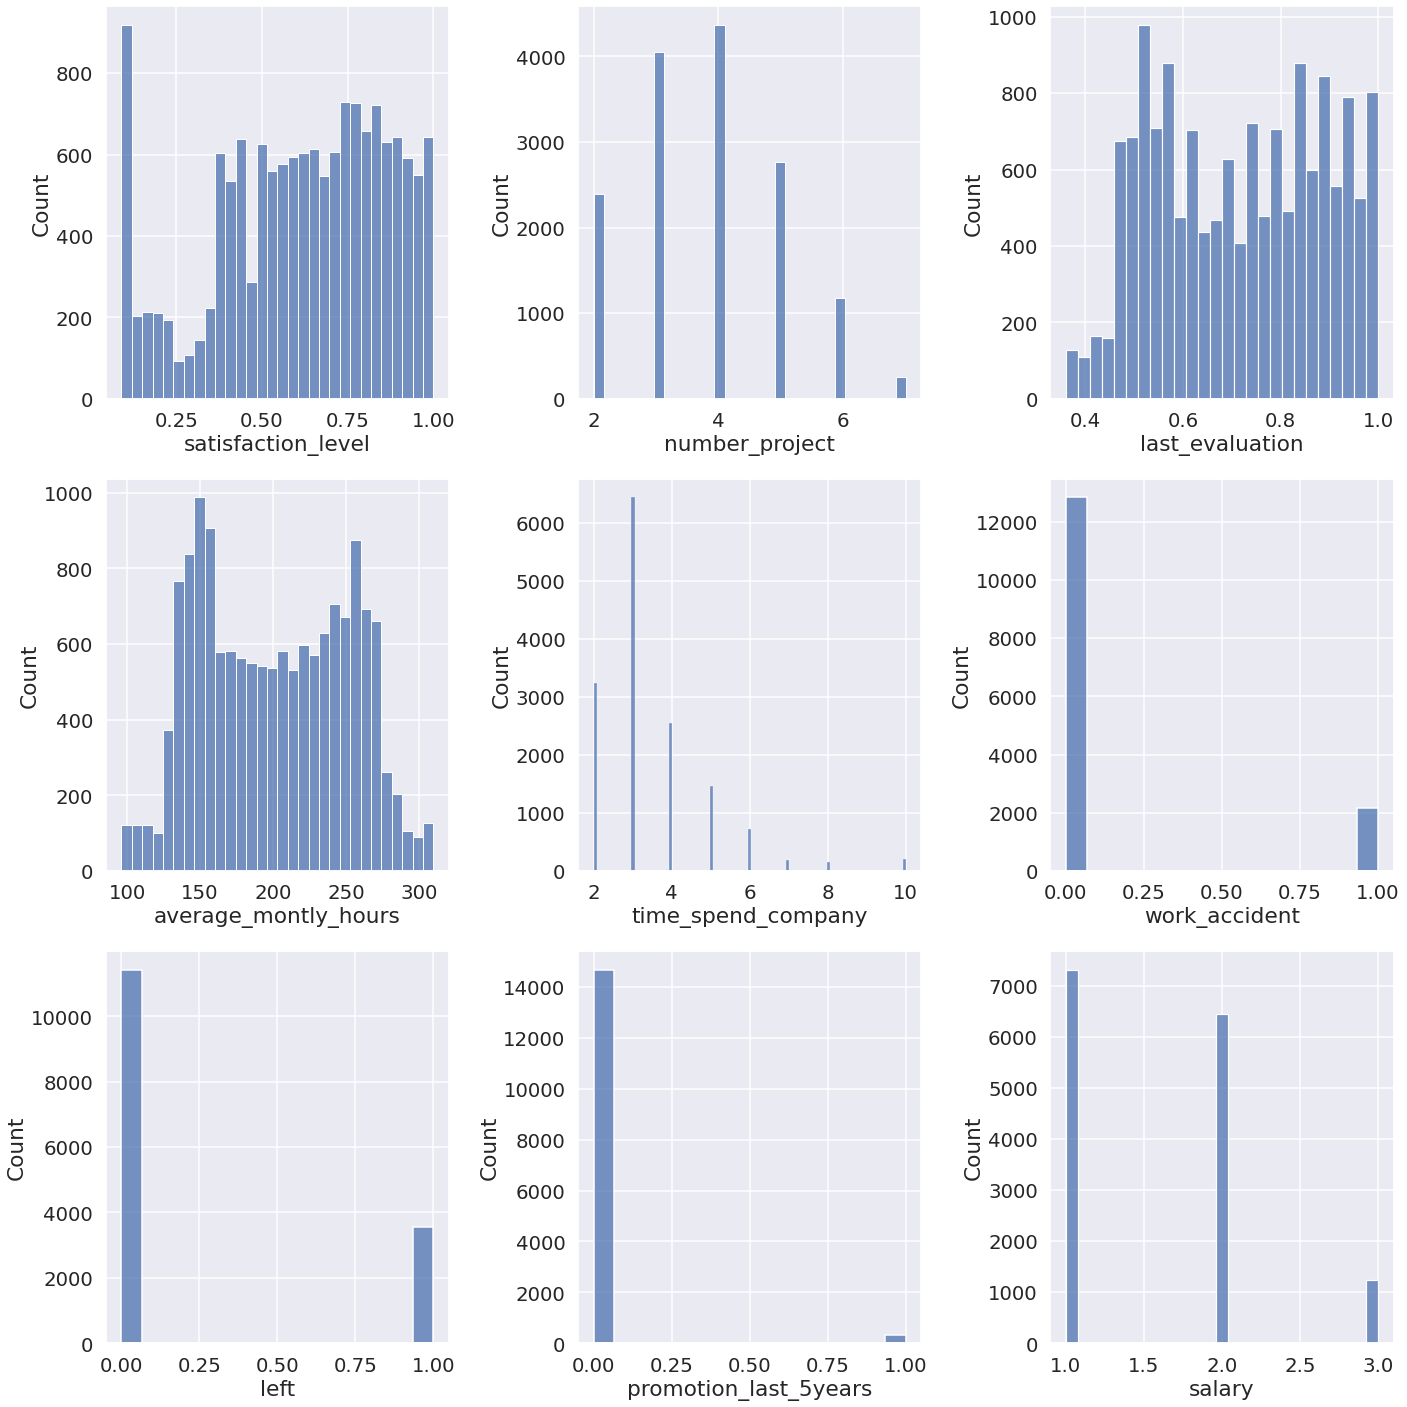

In [ ]:
# Configure the seaborn plot
sns.set()
sns.set(rc={'figure.figsize':(8,6)})
sns.set_context("talk", font_scale=1.2)

# Plot a histogram to see the distribution
fig, axs = plt.subplots(ncols = 3, nrows = 3, figsize=(20, 20))
sns.histplot(df['satisfaction_level'], kde=False,ax=axs[0,0])
sns.histplot(df['number_project'], kde=False,ax=axs[0,1])
sns.histplot(df['last_evaluation'], kde=False,ax=axs[0,2])
sns.histplot(df['average_montly_hours'], kde=False,ax=axs[1,0])
sns.histplot(df['time_spend_company'], kde=False,ax=axs[1,1])
sns.histplot(df['work_accident'], kde=False,ax=axs[1,2])
sns.histplot(df['left'], kde=False,ax=axs[2,0])
sns.histplot(df['promotion_last_5years'], kde=False,ax=axs[2,1])
sns.histplot(df['salary'], kde=False,ax=axs[2,2])
plt.tight_layout()
plt.show()

#The only abnormality in the histogram I notice is the spike in low satisfaction level


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


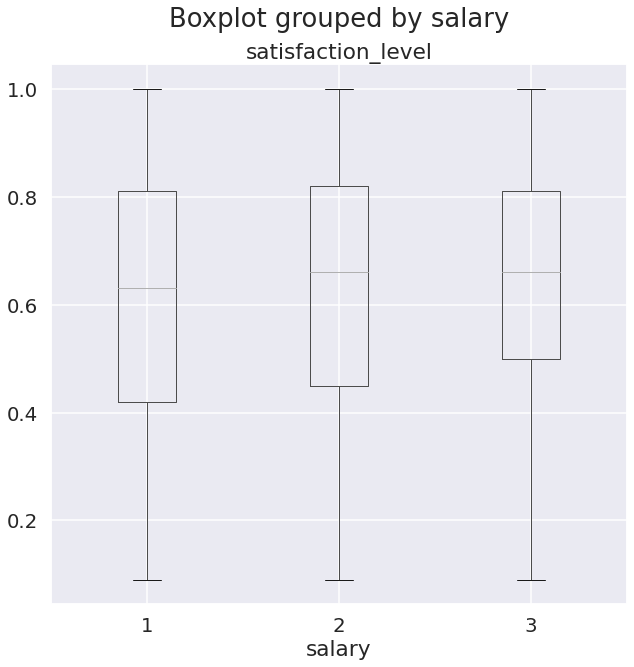

In [ ]:
# Checking if there's correlation between satisfaction_level and salary
df.boxplot(column='satisfaction_level', by ='salary', figsize=(10,10))
plt.show()

#Found no relationship between satisfaction level and salary

Categorical Variable Analysis

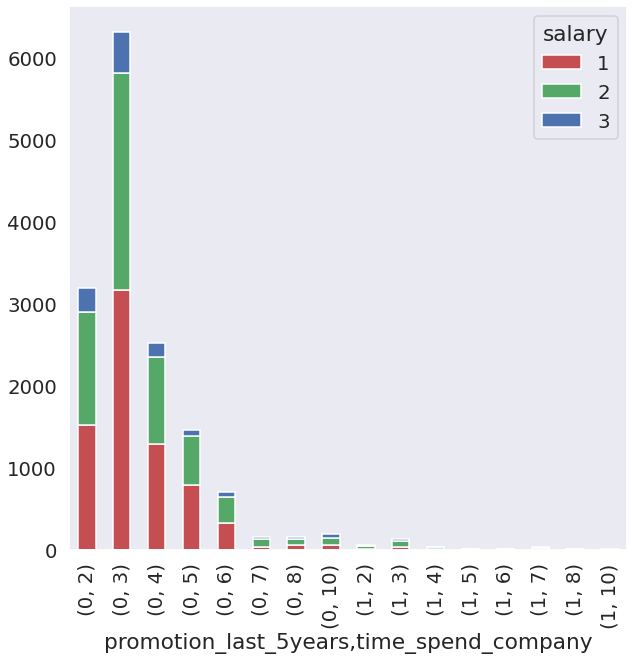

In [ ]:
temp1 = pd.crosstab([df.promotion_last_5years, df.time_spend_company], df.salary.astype('category'))
temp1.plot(kind='bar', stacked=True, color=['r','g','b'], grid=False, figsize=(10,10))
plt.show()

To my surprise, there is much more people who has high salary who is not promoted in the last 5 years, and have been working for less than 5 years.
This shows that they started with a higher salary

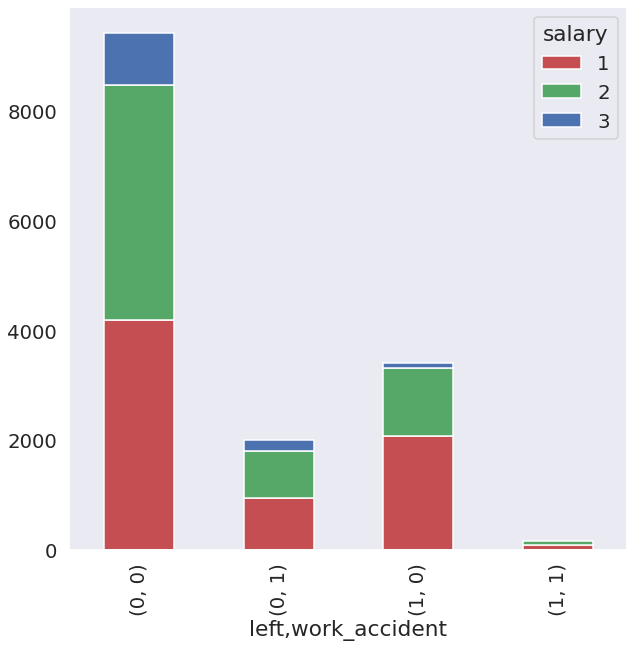

In [ ]:
temp2 = pd.crosstab([df.left, df.work_accident], df.salary.astype('category'))
temp2.plot(kind='bar', stacked=True, color=['r','g','b'], grid=False, figsize=(10,10))
plt.show()
#Check if it's necessary to drop left and work accident data, Found that if the person either left or have work accident, over 50% has low salary
#So I wont drop this data

Cleaning Data

I don't think we need to clean the data as it is complete, and i think every variable will affect the salary of the employee





Predictive Modelling and Machine Learning

In [ ]:
# Import decision tree from scikit-learn module
from sklearn import tree

train_data = pd.DataFrame()
train_data['satisfaction_level'] = df['satisfaction_level']


# Converting department data to numerical data (1 = sales, 2 = accounting, 3=hr, 4=technical, 5=support, 6=management, 7=IT, 8=product_mng, 9=marketing, 10 =RanD )
train_data['department'] = pd.Series([1 if s == 'sales' else 2 if s == 'accounting' else 3 if s == 'hr' else 4 if s == 'technical' else 5 if s == 'support' else 6 if s == 'management' else 7 if s == 'IT' else 8 if s == 'product_mng' else 9 if s == 'marketing' else 10 for s in df.department], name = 'department')
train_labels = df['salary']

classifier = tree.DecisionTreeClassifier(max_depth=3)
classifier.fit(train_data, train_labels)

# Performance of classifier
print(f'Score: {classifier.score(train_data, train_labels)}')

Score: 0.4931662110807387


In [ ]:
#(1 = sales, 2 = accounting, 3=hr, 4=technical, 5=support, 6=management, 7=IT, 8=product_mng, 9=marketing, 10 =RanD )
# To predict whether a person will get a high salary   1 = low salary, 2= medium salary, 3=high salary
print('Predicted salary of management ', classifier.predict([[0.9, 6]]))
print('Predicted salary of management ', classifier.predict([[0.5, 6]]))
print('Predicted salary of accounting ', classifier.predict([[0.9, 2]]))
print('Predicted salary of product_mng ', classifier.predict([[0.9, 8]]))

Predicted salary of management  [3]
Predicted salary of management  [3]
Predicted salary of accounting  [1]
Predicted salary of product_mng  [1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


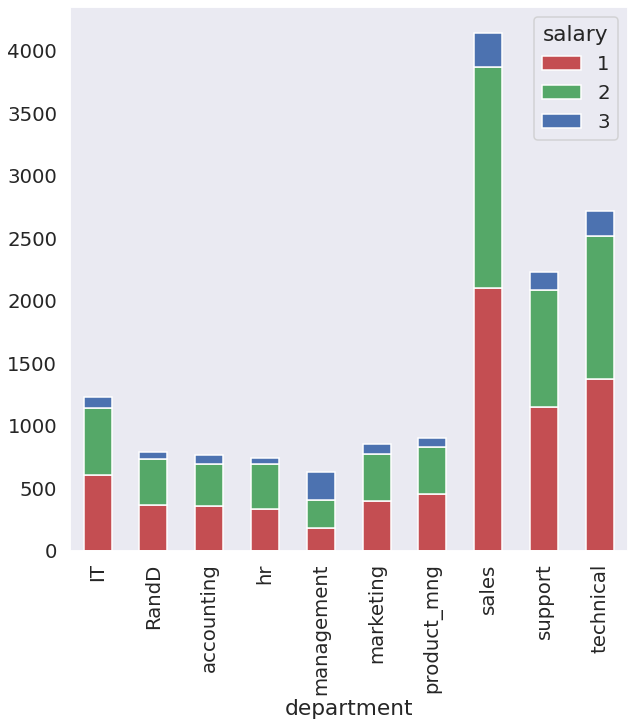

In [ ]:
temp2 = pd.crosstab([df.department], df.salary.astype('category'))
temp2.plot(kind='bar', stacked=True, color=['r','g','b'], grid=False, figsize=(10,10))
plt.show()
#Checking if management has higher percentage of high salary employee

Visualizing a Decision Tree

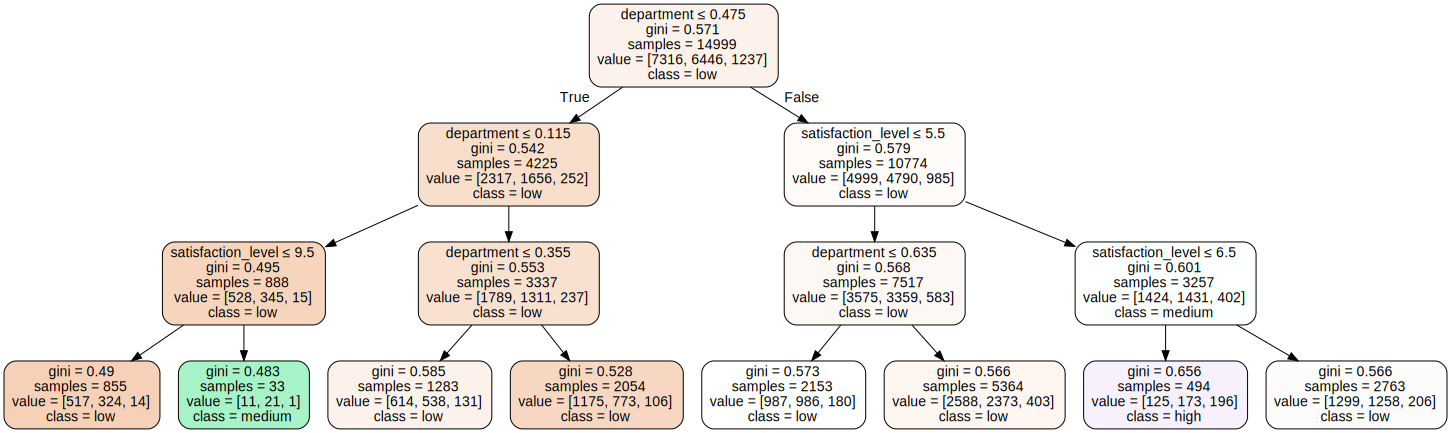

In [ ]:

import graphviz
dot_data = tree.export_graphviz(classifier, out_file=None,
                      feature_names=['department','satisfaction_level'],
                       class_names=['low','medium','high'],
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph